<a href="https://colab.research.google.com/github/Debayan97531/AI-ML-projects/blob/main/project5_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [3]:
loan_dataset=pd.read_csv('/content/project5_loan.csv')

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset.shape

(614, 13)

In [6]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
#dropping missing values
loan_dataset=loan_dataset.dropna()

In [20]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
#label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [22]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,Yes,5417,4196.0,267.0,360.0,1.0,2,1


In [23]:
#Dependent column values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [24]:
#replacing value of 3+ to 4
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [25]:
#Dependent ciolumn values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

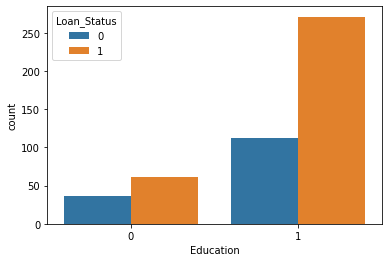

In [26]:
#education & loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

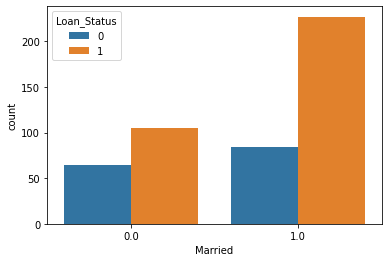

In [27]:
#marital status & loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

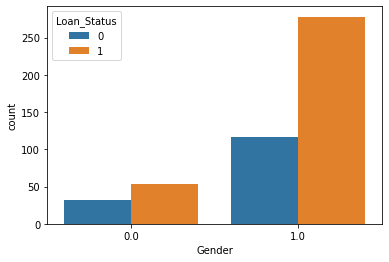

In [28]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

In [39]:
#convert categorical datas to numericavalues
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [40]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [41]:
#separating data and label
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']

In [42]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0          1          1              0             4583   
2       1.0      1.0          0          1              1             3000   
3       1.0      1.0          0          0              0             2583   
4       1.0      0.0          0          1              0             6000   
5       1.0      1.0          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1              0             2900   
610     1.0      1.0          4          1              0             4106   
611     1.0      1.0          1          1              0             8072   
612     1.0      1.0          2          1              0             7583   
613     0.0      0.0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [43]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [44]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [45]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


In [46]:
#training the model
#SVM
classifier=svm.SVC(kernel='linear')

In [47]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [48]:
#accuracy on training data
X_train_prediction=classifier.predict(X_train)
train_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data',train_data_accuracy)

Accuracy on training data 0.7786458333333334


In [49]:
#accuracy on test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data',test_data_accuracy)

Accuracy on test data 0.8125
